In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train_v9rqX0R.csv')

train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
train.shape

(8523, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
for col in train.columns:
    print(f'Col Name: {col}')
    print(f'Number of unique values = {train[col].nunique()}')
    print(f'Count of unique values : \n{train[col].value_counts()}')
    print('*'*15)

Col Name: Item_Identifier
Number of unique values = 1559
Count of unique values : 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
***************
Col Name: Item_Weight
Number of unique values = 415
Count of unique values : 
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64
***************
Col Name: Item_Fat_Content
Number of unique values = 5
Count of unique values : 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
***************
Col Name: Item_Visibility
Number of unique values = 7880
Count of unique values : 
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646    

# Benchmark

In [8]:
mrp = []
sales = []

for name,group_df in train.groupby(['Item_Type', 'Outlet_Type']):
    print(name)
    print(group_df)

('Baking Goods', 'Grocery Store')
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
23             FDC37          NaN          Low Fat         0.057557   
77             FDN48          NaN          Low Fat         0.113720   
205            FDF24       15.500          Regular         0.042465   
405            FDW24          NaN          Low Fat         0.065652   
430            FDW23          NaN          Low Fat         0.143593   
...              ...          ...              ...              ...   
7730           FDT36       12.300          Low Fat         0.186251   
7744           FDX36          NaN          Regular         0.224607   
8152           FDX23        6.445          Low Fat         0.049698   
8269           FDI60        7.220          Regular         0.064142   
8284           FDB49        8.300          Regular         0.050467   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
23    Baking Goods  107.6938        

7998               Tier 1  Grocery Store           109.8570  
('Breads', 'Supermarket Type1')
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
33             FDO23       17.850          Low Fat         0.000000    Breads   
114            FDV11        9.100          Regular         0.000000    Breads   
124            FDW11       12.600          Low Fat         0.049058    Breads   
327            FDZ35        9.600          Regular         0.022324    Breads   
329            FDV59       13.350          Low Fat         0.048124    Breads   
...              ...          ...              ...              ...       ...   
8191           FDY35       17.600          Regular         0.016053    Breads   
8240           FDQ47        7.155          Regular         0.168155    Breads   
8334           FDW59       13.150          Low Fat         0.020699    Breads   
8370           FDV23       11.000          Low Fat         0.105817    Breads   
8413           

7949       Small               Tier 1  Grocery Store           336.8948  
('Breakfast', 'Supermarket Type1')
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
15             FDP49        9.000          Regular         0.069089   
17             FDP49        9.000          Regular         0.069196   
157            FDN13       18.600          Low Fat         0.152918   
264            FDN01        8.895          Low Fat         0.072546   
339            FDM01        7.895              reg         0.095102   
...              ...          ...              ...              ...   
8136           FDR37       16.500          Regular         0.066250   
8222           FDL13       13.850          Regular         0.056406   
8303           FDO37        8.060          Low Fat         0.021373   
8317           FDN13       18.600          Low Fat         0.152367   
8335           FDO49       10.600          Regular         0.033104   

      Item_Type  Item_MRP Outlet_Ident

('Canned', 'Supermarket Type2')
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
43             FDC02       21.350          Low Fat         0.069103    Canned   
134            FDG02        7.855          Low Fat         0.011307    Canned   
162            FDV25        5.905          Low Fat         0.045838    Canned   
167            FDL50       12.150          Regular         0.042485    Canned   
349            FDX25       16.700          Low Fat         0.000000    Canned   
...              ...          ...              ...              ...       ...   
7825           FDT25        7.500          Low Fat         0.050958    Canned   
8139           FDI02       15.700          Regular         0.115032    Canned   
8210           FDI50        8.420          Regular         0.030968    Canned   
8403           FDY25       12.000          Low Fat         0.034113    Canned   
8489           FDV13       17.350          Regular         0.027723    Canned

[73 rows x 12 columns]
('Dairy', 'Supermarket Type3')
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
198            FDE40          NaN          Regular         0.098664     Dairy   
456            FDS26          NaN          Low Fat         0.089036     Dairy   
721            FDA03          NaN          Regular         0.045244     Dairy   
726            FDV02          NaN          Low Fat         0.060252     Dairy   
758            FDC04          NaN          Low Fat         0.044768     Dairy   
...              ...          ...              ...              ...       ...   
7826           FDM39          NaN          Low Fat         0.053212     Dairy   
7837           FDC16          NaN          Regular         0.020470     Dairy   
7856           FDJ15          NaN          Regular         0.023210     Dairy   
7987           FDI27          NaN          Regular         0.045764     Dairy   
8165           FDD39          NaN          Low Fat     

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
151            FDR28       13.850              reg         0.026002   
152            FDI04       13.650          Regular         0.073209   
307            FDR04        7.075          Low Fat         0.000000   
444            FDJ41        6.850          Low Fat         0.022976   
469            FDR52       12.650          Regular         0.076354   
...              ...          ...              ...              ...   
7961           FDQ52       17.000          Low Fat         0.119871   
8270           FDU40       20.850          Low Fat         0.037556   
8308           FDP16       18.600          Low Fat         0.039455   
8482           FDZ28       20.000          Regular         0.051702   
8511           FDF05       17.500          Low Fat         0.026980   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
151   Frozen Foods  161.5210            OUT018                       2

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
36             FDV20          NaN          Regular         0.059512   
62             FDF09          NaN          Low Fat         0.012090   
161            FDR07          NaN          Low Fat         0.077367   
319            FDY31          NaN          Low Fat         0.043352   
359            FDJ56          NaN          Low Fat         0.182515   
...              ...          ...              ...              ...   
8251           FDL08          NaN          Low Fat         0.049478   
8263           FDB32          NaN          Low Fat         0.023339   
8305           FDS32          NaN          Regular         0.029510   
8373           FDX44          NaN          Low Fat         0.042758   
8422           FDD08          NaN          Low Fat         0.035183   

                  Item_Type  Item_MRP Outlet_Identifier  \
36    Fruits and Vegetables  128.0678            OUT027   
62    Fruits and Vegetables  

[335 rows x 12 columns]
('Health and Hygiene', 'Supermarket Type2')
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
16             NCB42       11.800          Low Fat         0.008596   
31             NCS17       18.600          Low Fat         0.080829   
526            NCI29        8.600          Low Fat         0.032754   
571            NCM41       16.500          Low Fat         0.035801   
843            NCR17        9.800          Low Fat         0.024483   
1027           NCP29        8.420          Low Fat         0.112728   
1161           NCR29        7.565          Low Fat         0.054863   
1267           NCZ53        9.600          Low Fat         0.024577   
1508           NCR53       12.150          Low Fat         0.000000   
1674           NCN41       17.000          Low Fat         0.052422   
1864           NCP41       16.600          Low Fat         0.016277   
1948           NCL17        7.390          Low Fat         0.068056   
2441     

[95 rows x 12 columns]
('Household', 'Supermarket Type3')
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
98             NCP18          NaN          Low Fat         0.028460   
168            NCB30          NaN          Low Fat         0.025579   
194            NCX06          NaN          Low Fat         0.015611   
230            NCX42          NaN          Low Fat         0.005950   
282            NCF07          NaN          Low Fat         0.031867   
...              ...          ...              ...              ...   
8086           NCN42          NaN          Low Fat         0.014154   
8329           NCQ06          NaN          Low Fat         0.041622   
8351           NCE43          NaN               LF         0.102941   
8383           NCQ54          NaN          Low Fat         0.012482   
8504           NCN18          NaN          Low Fat         0.124111   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
98    Household

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
275            FDH19          NaN          Low Fat         0.032928      Meat   
357            FDN39          NaN          Regular         0.065203      Meat   
669            FDO51          NaN          Regular         0.041779      Meat   
817            FDQ15          NaN          Regular         0.150342      Meat   
1014           FDS03          NaN          Low Fat         0.079243      Meat   
1374           FDG31          NaN          Low Fat         0.037713      Meat   
1379           FDI19          NaN          Low Fat         0.052086      Meat   
1416           FDR51          NaN          Regular         0.172630      Meat   
1485           FDK15          NaN          Low Fat         0.097937      Meat   
1949           FDW27          NaN          Regular         0.150123      Meat   
1970           FDW39          NaN          Regular         0.036732      Meat   
2550           FDX03        

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
716            FDG21       17.350          Regular         0.146896   Seafood   
3036           FDF33        7.970          Low Fat         0.021623   Seafood   
3699           FDJ45       17.750               LF         0.073710   Seafood   
5042           FDI09       20.750          Regular         0.129864   Seafood   
7011           FDG33        5.365          Regular         0.140812   Seafood   
8328           FDI57       19.850          Low Fat         0.054246   Seafood   
8423           FDJ57        7.420          Regular         0.021662   Seafood   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
716   149.6050            OUT018                       2009      Medium   
3036  107.6596            OUT018                       2009      Medium   
3699   35.1216            OUT018                       2009      Medium   
5042  240.1880            OUT018                   

[137 rows x 12 columns]
('Soft Drinks', 'Grocery Store')
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
108            DRE60          NaN          low fat         0.278974   
178            DRY23          NaN          Regular         0.191014   
509            DRN36          NaN          Low Fat         0.087855   
833            DRD60          NaN          Low Fat         0.065189   
906            DRK12        9.500          Low Fat         0.000000   
913            DRM37       15.350          Low Fat         0.161350   
1046           DRK37          NaN          Low Fat         0.077047   
1177           DRH01          NaN          Low Fat         0.171417   
1185           DRH37          NaN          Low Fat         0.072865   
1204           DRH49          NaN          Low Fat         0.043169   
1252           DRE37          NaN          Low Fat         0.164966   
1708           DRC25          NaN          Low Fat         0.079440   
1913           DRK49

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
1              DRC01        5.920          Regular         0.019278   
37             DRZ11        8.850          Regular         0.113124   
517            DRD37        9.800          Low Fat         0.013898   
560            DRH13        8.575          Low Fat         0.023983   
1103           DRF36       16.100          Low Fat         0.023673   
1446           DRK01        7.630          Low Fat         0.061313   
1602           DRJ49        6.865          Low Fat         0.014050   
1931           DRG48        5.780          Low Fat         0.014614   
2135           DRK12        9.500          Low Fat         0.042057   
2292           DRE49       20.750          Low Fat         0.021337   
2781           DRH49       19.700          Low Fat         0.024756   
3142           DRM37       15.350          Low Fat         0.096790   
3356           DRN37        9.600               LF         0.096690   
3437  

8463      Medium               Tier 3  Supermarket Type3           810.9444  


In [9]:
mrp = []
sales = []

for name,group_df in train.groupby(['Item_Type', 'Outlet_Type']):
    print(name)
    print(f'Mean MRP: {group_df["Item_MRP"].mean()}')
    mrp.append(group_df["Item_MRP"].mean())
    
    print(f'Mean Sales: {group_df["Item_Outlet_Sales"].mean()}')
    sales.append(group_df["Item_Outlet_Sales"].mean())
    print('\n\n')

('Baking Goods', 'Grocery Store')
Mean MRP: 126.43806823529412
Mean Sales: 292.0825435294118



('Baking Goods', 'Supermarket Type1')
Mean MRP: 125.97526150234742
Mean Sales: 2102.021248826291



('Baking Goods', 'Supermarket Type2')
Mean MRP: 126.38531470588235
Mean Sales: 1780.3687823529413



('Baking Goods', 'Supermarket Type3')
Mean MRP: 128.8092434782609
Mean Sales: 3248.8724173913047



('Breads', 'Grocery Store')
Mean MRP: 146.4528727272727
Mean Sales: 381.9674424242425



('Breads', 'Supermarket Type1')
Mean MRP: 140.56755249999998
Mean Sales: 2346.928355



('Breads', 'Supermarket Type2')
Mean MRP: 131.08900740740742
Mean Sales: 2022.4044888888889



('Breads', 'Supermarket Type3')
Mean MRP: 145.67623870967745
Mean Sales: 3565.1227483870966



('Breakfast', 'Grocery Store')
Mean MRP: 147.02698947368424
Mean Sales: 412.8310421052632



('Breakfast', 'Supermarket Type1')
Mean MRP: 141.65657058823527
Mean Sales: 2228.3346882352944



('Breakfast', 'Supermarket Type2')
Mean MRP: 

In [10]:
mrp

[126.43806823529412,
 125.97526150234742,
 126.38531470588235,
 128.8092434782609,
 146.4528727272727,
 140.56755249999998,
 131.08900740740742,
 145.67623870967745,
 147.02698947368424,
 141.65657058823527,
 129.3845,
 147.0839090909091,
 138.08080821917804,
 140.02185305164318,
 139.13421794871795,
 140.62568888888887,
 147.1667152173913,
 149.28820888888887,
 145.7389671232877,
 148.03706268656717,
 133.49942718446601,
 138.7209388111888,
 144.0621456521739,
 137.14995505617978,
 140.94351710526317,
 145.8782459627329,
 140.49845777777776,
 145.00990428571427,
 117.18934999999999,
 135.24658344827586,
 164.05079090909092,
 143.57653043478263,
 133.79139402985075,
 131.49476597014925,
 126.5504103448276,
 127.85241666666667,
 151.9504991596639,
 149.31894338358458,
 149.94366947368422,
 146.52887070707072,
 137.5916484848485,
 140.73836031128405,
 138.38989130434783,
 139.87716785714287,
 128.41722962962965,
 138.56704485981308,
 127.81334,
 106.77905333333335,
 143.81622,
 142.03810

In [11]:
sales

[292.0825435294118,
 2102.021248826291,
 1780.3687823529413,
 3248.8724173913047,
 381.9674424242425,
 2346.928355,
 2022.4044888888889,
 3565.1227483870966,
 412.8310421052632,
 2228.3346882352944,
 1874.670866666667,
 4584.759327272727,
 352.8648794520548,
 2348.732969953052,
 1867.71411025641,
 3779.866813888888,
 341.86658913043476,
 2392.6543893333333,
 2083.9813616438355,
 3915.182244776119,
 322.2859844660194,
 2259.90910979021,
 1995.6414195652176,
 3553.6214696629213,
 319.75045,
 2399.947642484472,
 1951.6422785185182,
 4114.487061428571,
 243.15570833333334,
 2231.408037241379,
 2247.528954545455,
 3432.951643478262,
 365.9018179104478,
 2127.626505074627,
 1876.6491344827589,
 3318.069783333333,
 367.2866117647058,
 2407.4034318257955,
 2065.9703915789473,
 3821.207781818182,
 387.5258636363636,
 2260.875453696498,
 2057.7272695652173,
 3862.2939107142856,
 288.09412592592594,
 2244.4180224299066,
 1853.6204899999998,
 2700.9286666666667,
 228.43598000000003,
 2640.19661,
 

Text(0.5, 1.0, 'Benchmark')

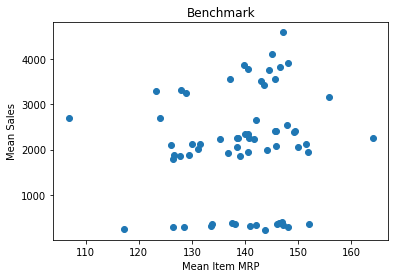

In [12]:
plt.scatter(mrp, sales)
plt.xlabel('Mean Item MRP')
plt.ylabel('Mean Sales')
plt.title('Benchmark')

# Steps for Data Preprocessing

* Data Cleansing -> (if required)
* Missing Value Imputation -> (if required)
* Feature Engineering -> (if required)
* EDA - Exploratory Data Analysis
* Outlier Handling -> (if there are outlier)
* Categorical Encoding -> (if there are categorical varible)
* Data Splits
* Feature Scaling

#### Data Cleansing

In [13]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [14]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
Item_Fat_Content_Dict = {'low fat':'Low Fat',
                        'LF':'Low Fat',
                        'Low Fat':'Low Fat',
                        'reg':'Regular',
                        'Regular':'Regular'}

In [16]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map(Item_Fat_Content_Dict)

In [17]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Missing Value Imputation

In [18]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
train['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

#### Mean imputation

In [20]:
print(f'Mean : {train["Item_Weight"].mean()}')

Mean : 12.857645184135976


In [21]:
train["Item_Weight_Mean"] = train["Item_Weight"].fillna(train["Item_Weight"].mean())

In [22]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [23]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
dtype: int64

In [24]:
train[['Item_Weight','Item_Weight_Mean']]

,Item_Weight,Item_Weight_Mean
0,9.300,9.300
1,5.920,5.920
2,17.500,17.500
3,19.200,19.200
4,8.930,8.930
...,...,...
8518,6.865,6.865
8519,8.380,8.380
8520,10.600,10.600
8521,7.210,7.210


#### Median Imputation

In [25]:
train['Item_Weight'].median()

12.6

In [26]:
train['Item_Weight_Median'] = train['Item_Weight'].fillna(train['Item_Weight'].median())

In [27]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,7.210


In [28]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
dtype: int64

#### Custom Statistical Imputation

In [29]:
weight_dict = {}

for group, df in train.groupby(['Item_Type', 'Item_Fat_Content']):
    if df['Item_Weight'].isnull().sum() != 0:
        print(f"{group} : {df['Item_Weight'].isnull().sum()} : {df['Item_Weight'].shape[0]}")
        weight_dict[group] = df['Item_Weight'].mean()

('Baking Goods', 'Low Fat') : 67 : 329
('Baking Goods', 'Regular') : 45 : 319
('Breads', 'Low Fat') : 27 : 140
('Breads', 'Regular') : 20 : 111
('Breakfast', 'Low Fat') : 7 : 41
('Breakfast', 'Regular') : 14 : 69
('Canned', 'Low Fat') : 55 : 341
('Canned', 'Regular') : 55 : 308
('Dairy', 'Low Fat') : 64 : 418
('Dairy', 'Regular') : 52 : 264
('Frozen Foods', 'Low Fat') : 75 : 450
('Frozen Foods', 'Regular') : 63 : 406
('Fruits and Vegetables', 'Low Fat') : 112 : 630
('Fruits and Vegetables', 'Regular') : 101 : 602
('Hard Drinks', 'Low Fat') : 31 : 214
('Health and Hygiene', 'Low Fat') : 90 : 520
('Household', 'Low Fat') : 151 : 910
('Meat', 'Low Fat') : 38 : 170
('Meat', 'Regular') : 50 : 255
('Others', 'Low Fat') : 32 : 169
('Seafood', 'Low Fat') : 8 : 37
('Seafood', 'Regular') : 5 : 27
('Snack Foods', 'Low Fat') : 127 : 692
('Snack Foods', 'Regular') : 85 : 508
('Soft Drinks', 'Low Fat') : 59 : 374
('Soft Drinks', 'Regular') : 12 : 71
('Starchy Foods', 'Low Fat') : 8 : 82
('Starchy Fo

In [30]:
weight_dict

{('Baking Goods', 'Low Fat'): 12.552996183206108,
 ('Baking Goods', 'Regular'): 12.013302919708028,
 ('Breads', 'Low Fat'): 12.429911504424778,
 ('Breads', 'Regular'): 10.002142857142857,
 ('Breakfast', 'Low Fat'): 11.849411764705884,
 ('Breakfast', 'Regular'): 13.33618181818182,
 ('Canned', 'Low Fat'): 11.86465034965035,
 ('Canned', 'Regular'): 12.804288537549407,
 ('Dairy', 'Low Fat'): 13.391497175141243,
 ('Dairy', 'Regular'): 13.483797169811321,
 ('Frozen Foods', 'Low Fat'): 12.580333333333334,
 ('Frozen Foods', 'Regular'): 13.180539358600583,
 ('Fruits and Vegetables', 'Low Fat'): 12.75704633204633,
 ('Fruits and Vegetables', 'Regular'): 13.708363273453093,
 ('Hard Drinks', 'Low Fat'): 11.400327868852457,
 ('Health and Hygiene', 'Low Fat'): 13.14231395348837,
 ('Household', 'Low Fat'): 13.384736495388669,
 ('Meat', 'Low Fat'): 13.565643939393938,
 ('Meat', 'Regular'): 12.335512195121952,
 ('Others', 'Low Fat'): 13.853284671532847,
 ('Seafood', 'Low Fat'): 13.80534482758621,
 ('Sea

In [31]:
train['Item_Weight_Grouped_Mean'] = train['Item_Weight']
for group, mean in weight_dict.items():
    train.loc[(train['Item_Type'] == group[0]) & (train['Item_Fat_Content'] == group[1]) & 
              (train['Item_Weight'].isna()), 'Item_Weight_Grouped_Mean'] = mean

In [32]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Weight_Grouped_Mean
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,9.300,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,5.920,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,17.500,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200,19.200,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,8.930,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865,6.865,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380,8.380,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600,10.600,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,7.210,7.210


In [33]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_Grouped_Mean        0
dtype: int64

#### Comparison of imputation methods

In [34]:
df = train[train['Item_Weight'].isnull()]

In [35]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Weight_Grouped_Mean
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,12.857645,12.6,13.707177
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,12.857645,12.6,11.400328
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,12.857645,12.6,12.013303
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,12.857645,12.6,12.552996
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,12.857645,12.6,12.804289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490,12.857645,12.6,11.963444
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150,12.857645,12.6,11.963444
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120,12.857645,12.6,13.853285
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656,12.857645,12.6,13.708363


In [36]:
var_original = train['Item_Weight'].var()
var_original

21.561688259836558

Text(0.5, 1.0, 'Frequency Distibution of Item_Weight')

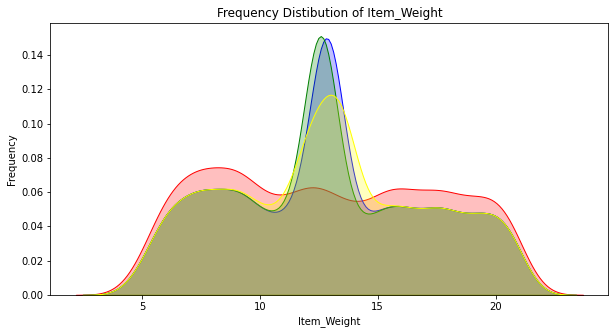

In [37]:
import seaborn as sns


var_original = train['Item_Weight'].var()
var_mean = train['Item_Weight_Mean'].var()
var_median = train['Item_Weight_Median'].var()
var_gp_mean = train['Item_Weight_Grouped_Mean'].var()

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax = sns.kdeplot(train['Item_Weight'].dropna(), color='Red', shade=True, label=f"Original Var : {var_original}")
ax = sns.kdeplot(train['Item_Weight_Mean'], color='Blue', shade=True, label=f"Mean Var : {var_mean}")
ax = sns.kdeplot(train['Item_Weight_Median'], color='Green', shade=True, label=f"Median Var : {var_median}")
ax = sns.kdeplot(train['Item_Weight_Grouped_Mean'], color='Yellow', shade=True, label=f"Grouped Mean Var : {var_gp_mean}")
ax.set_xlabel('Item_Weight')
ax.set_ylabel('Frequency')
ax.set_title('Frequency Distibution of Item_Weight')

In [38]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_Grouped_Mean        0
dtype: int64

#### Mode Imputation

In [39]:
train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [40]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [41]:
train['Outlet_Size'].mode().values[0]

'Medium'

In [42]:
train['Outlet_Size_Mode'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode().values[0])

In [43]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Weight_Grouped_Mean,Outlet_Size_Mode
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,9.300,9.300,Medium
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,5.920,5.920,Medium
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,17.500,17.500,Medium
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200,19.200,19.200,Medium
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,8.930,8.930,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865,6.865,6.865,High
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380,8.380,8.380,Medium
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600,10.600,10.600,Small
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,7.210,7.210,Medium


In [44]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_Grouped_Mean        0
Outlet_Size_Mode                0
dtype: int64

#### Custom Mode Imputation

In [45]:
size_dict = {}
for group, df in train.groupby(['Outlet_Type']):
    if df['Outlet_Size'].isnull().sum() != 0:
        print(f"{group} : {df['Outlet_Size'].isnull().sum()} : {df['Outlet_Size'].shape[0]}")
        size_dict[group] = df['Outlet_Size'].mode().values[0]

Grocery Store : 555 : 1083
Supermarket Type1 : 1855 : 5577


In [46]:
size_dict

{'Grocery Store': 'Small', 'Supermarket Type1': 'Small'}

In [47]:
train['Outlet_Size_Grouped_Mode'] = train['Outlet_Size']
for group, mode in size_dict.items():
    train.loc[(train['Outlet_Type'] == group) & (train['Outlet_Size'].isnull()), "Outlet_Size_Grouped_Mode"] = mode

In [48]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Weight_Grouped_Mean,Outlet_Size_Mode,Outlet_Size_Grouped_Mode
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,9.300,9.300,Medium,Medium
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,5.920,5.920,Medium,Medium
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,17.500,17.500,Medium,Medium
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200,19.200,19.200,Medium,Small
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,8.930,8.930,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865,6.865,6.865,High,High
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380,8.380,8.380,Medium,Small
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600,10.600,10.600,Small,Small
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,7.210,7.210,Medium,Medium


In [49]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_Grouped_Mean        0
Outlet_Size_Mode                0
Outlet_Size_Grouped_Mode        0
dtype: int64

# EDA - Exploratory Data Analysis

In [50]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_Mean',
       'Item_Weight_Median', 'Item_Weight_Grouped_Mean', 'Outlet_Size_Mode',
       'Outlet_Size_Grouped_Mode'],
      dtype='object')

In [51]:
num_cols = ['Item_Weight_Grouped_Mean', 'Item_Visibility', 'Item_MRP']
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size_Grouped_Mode', 'Outlet_Location_Type', 'Outlet_Type']
target = 'Item_Outlet_Sales'

##### Exploratory Analysis


#### Univariate Analysis

* Conitunous Data -> num_cols -> pd.describe() -> distribution(distplot/kdeplot), skewness
* Categorical Data -> cat_cols -> value_counts() -> distribution(countplot, boxplot), outliers

#### Conitnuous 

In [52]:
train[num_cols].describe()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP
count,8523.000000,8523.000000,8523.000000
mean,12.860708,0.066132,140.992782
std,4.237815,0.051598,62.275067
min,4.555000,0.000000,31.290000
25%,9.310000,0.026989,93.826500
50%,12.800000,0.053931,143.012800
75%,16.000000,0.094585,185.643700
max,21.350000,0.328391,266.888400


C:\Users\shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

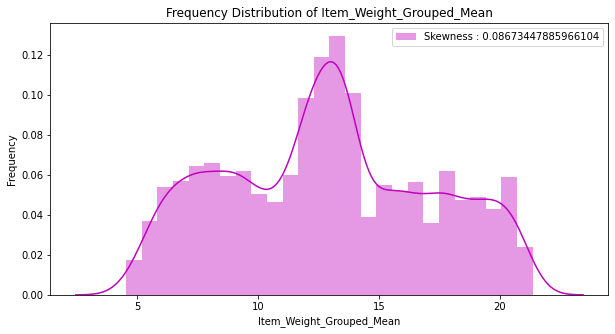

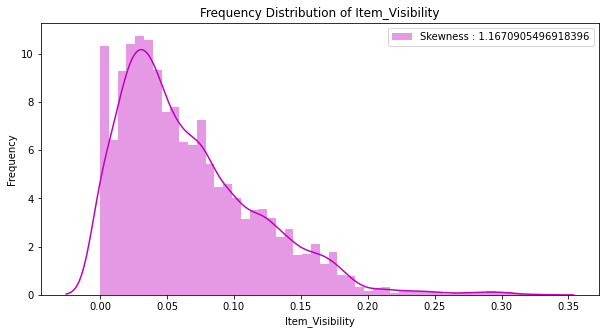

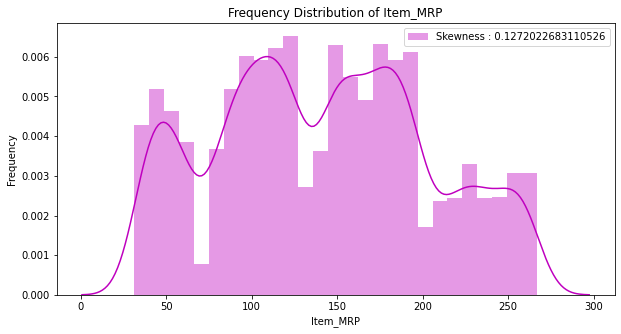

In [53]:
for col in num_cols:
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax = sns.distplot(train[col], color='m', label=f'Skewness : {train[col].skew()}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.set_title(f'Frequency Distribution of {col}')

#### Categorical

In [54]:
for col in cat_cols:
    print(f'\n{col}:')
    print(train[col].value_counts())


Item_Fat_Content:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Establishment_Year:
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Outlet_Size_Grouped_Mode:
Small     4798
Medium    2793
High       932
Name: Outlet_Size_Grouped_Mode, dtype: int64

Outlet_Location_Type:
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_L

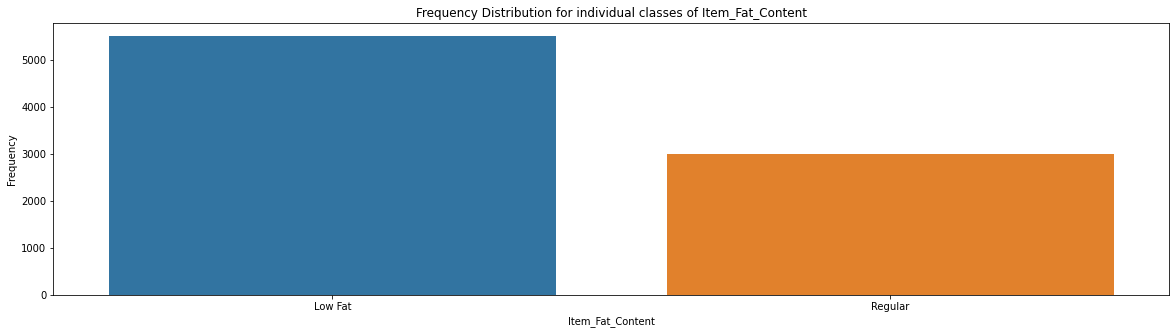

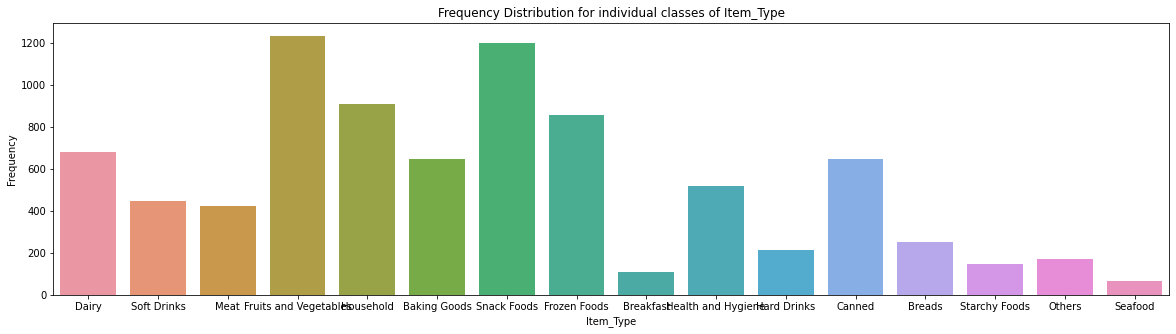

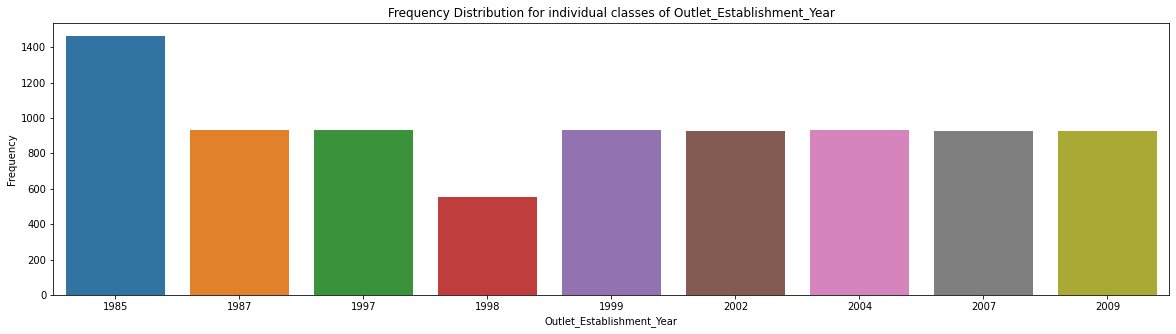

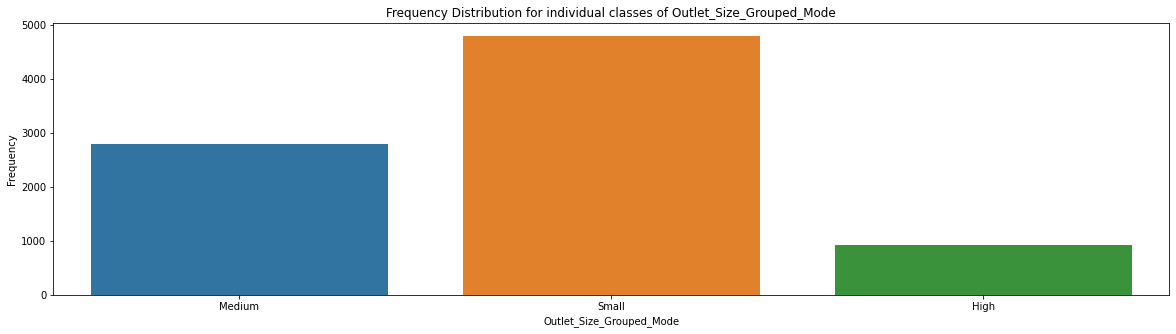

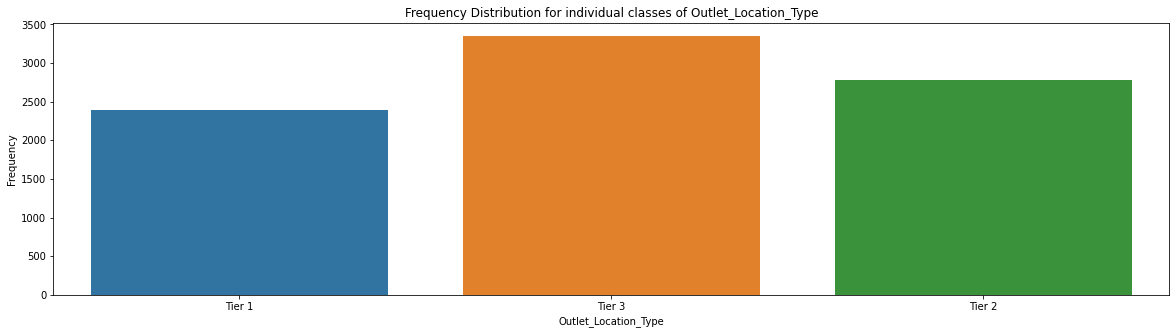

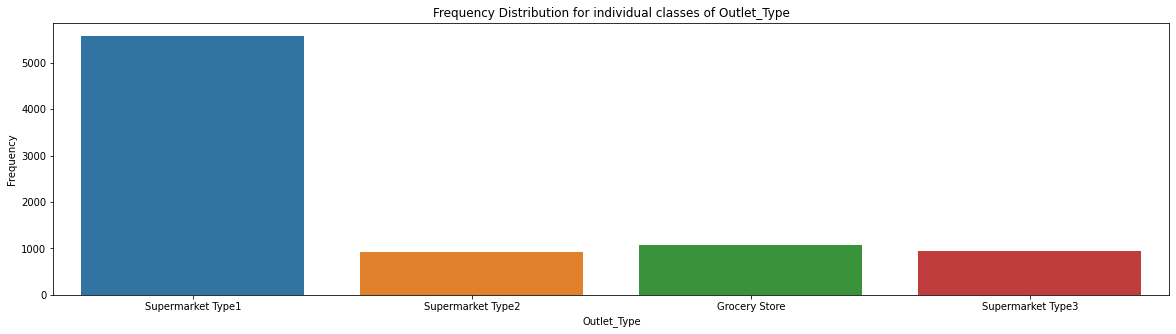

In [55]:
for col in cat_cols:
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(111)
    sns.countplot(x = col, data = train, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency Distribution for individual classes of {col}')

#### Bivariate Analysis

* Cont vs Cont -> pairplot
* Cont vs Catg -> boxplot
* Catg vs Catg -> heatmap

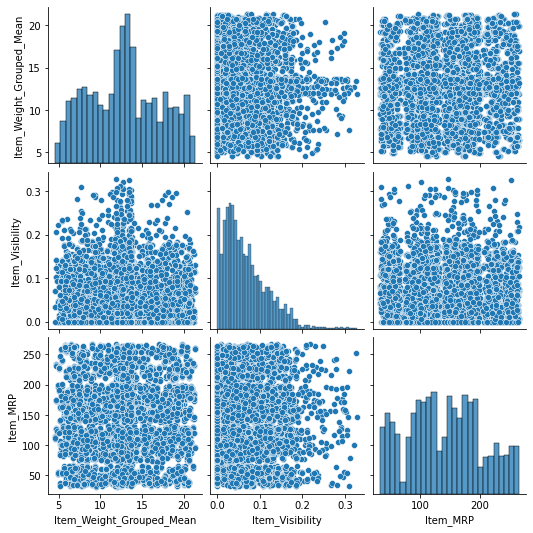

In [56]:
sns.pairplot(train[num_cols])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_MRP'>

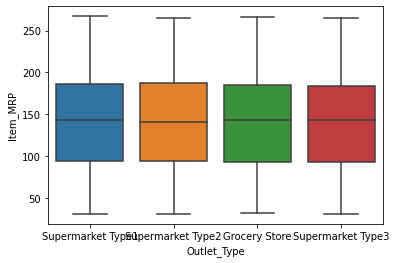

In [57]:
sns.boxplot(x = train['Outlet_Type'], y = train['Item_MRP'], data=train)

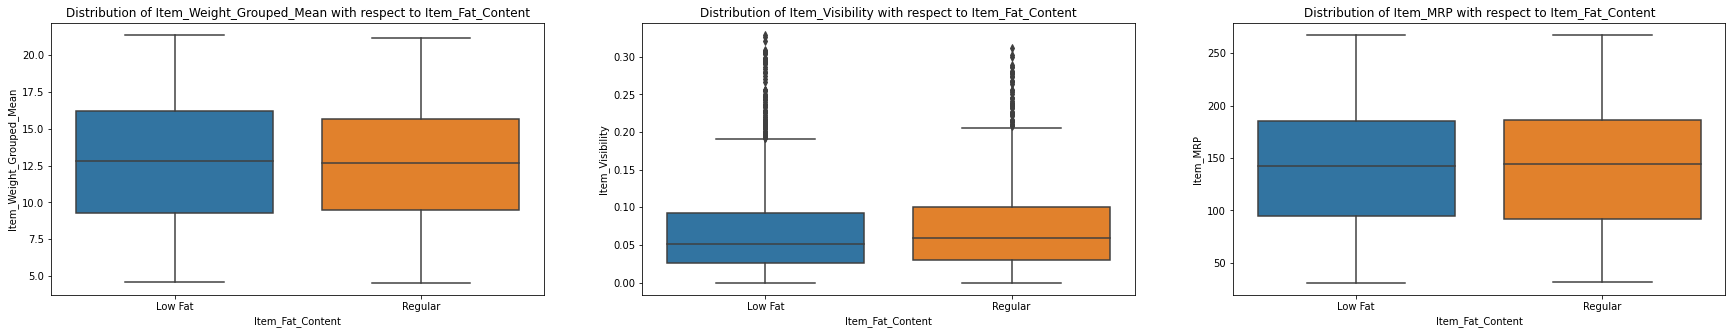

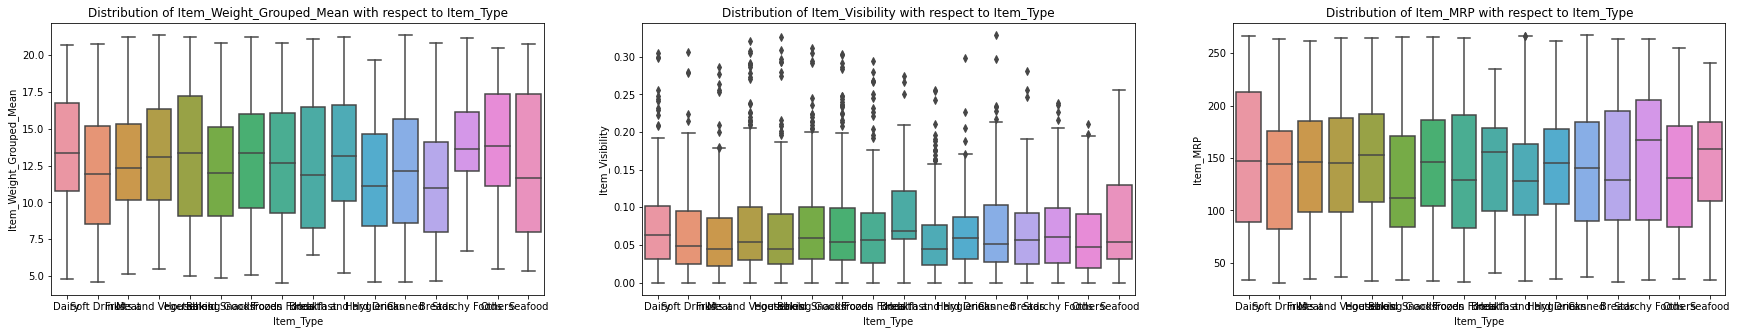

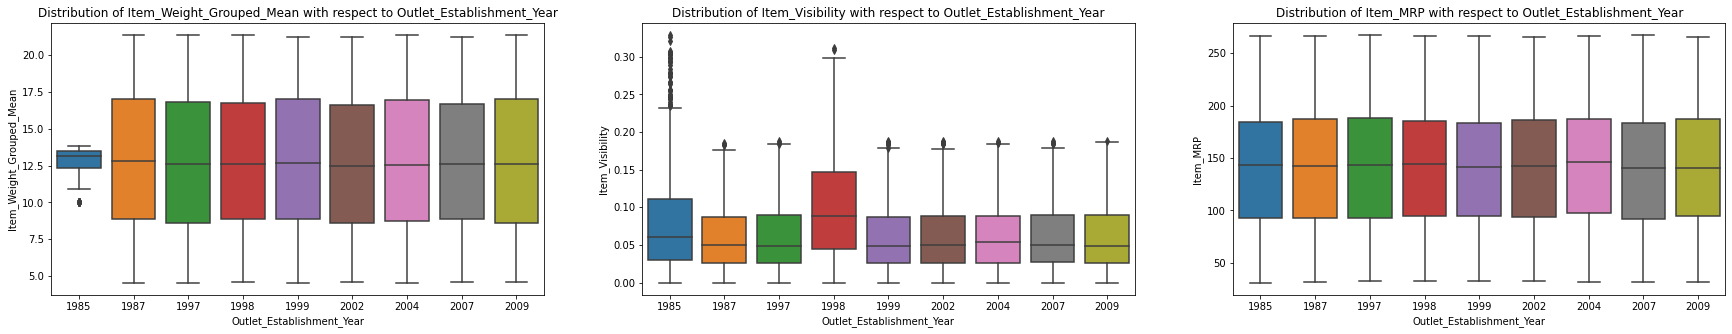

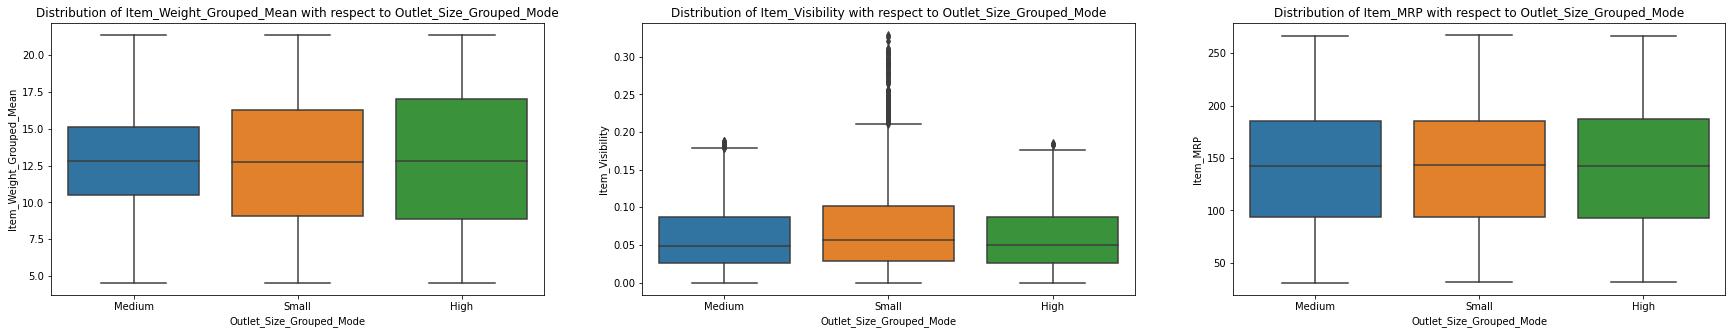

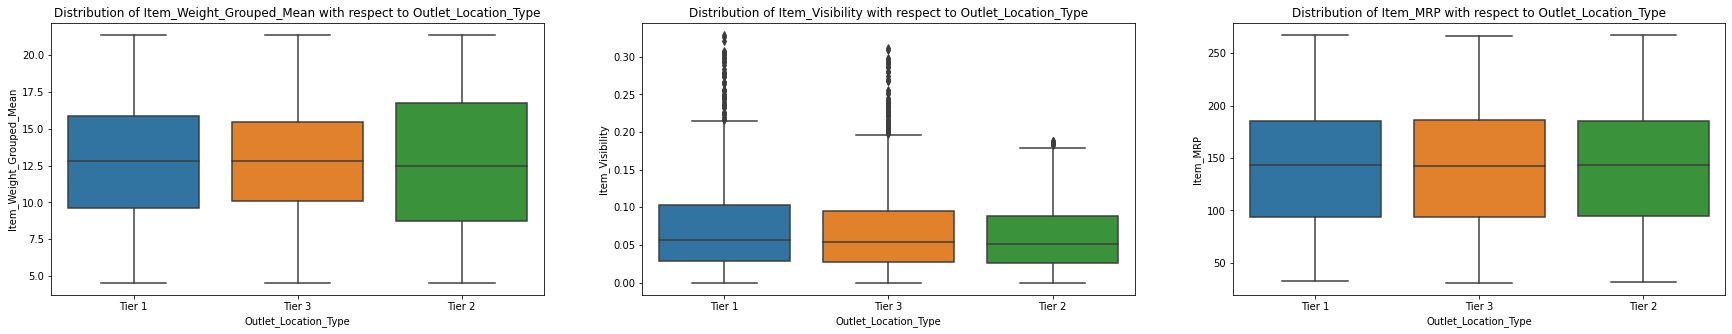

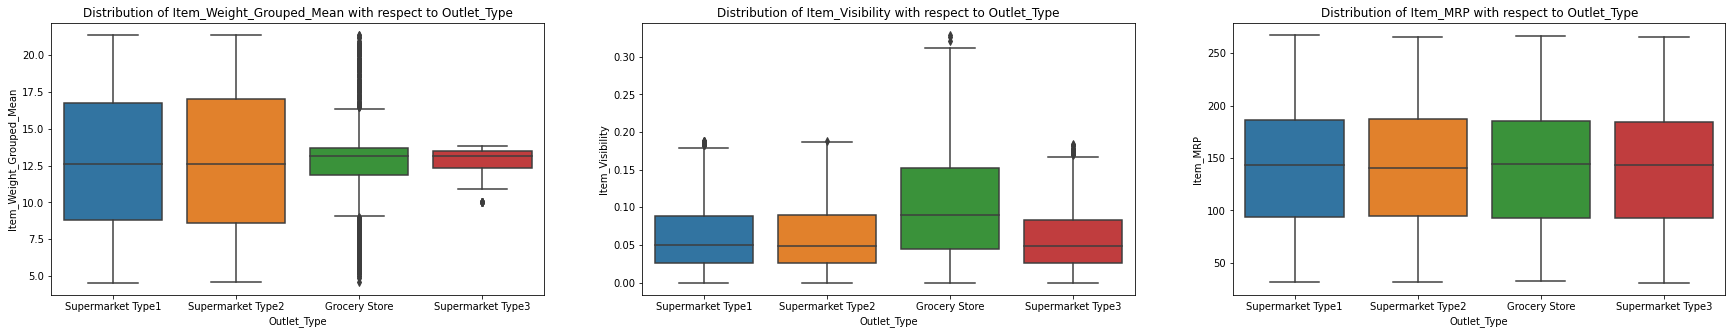

In [58]:
for cat_col in cat_cols:
    fig = plt.figure(figsize=(30,5))
    i = 1
    for num_col in num_cols:
        ax = fig.add_subplot(1, len(num_cols), i)
        sns.boxplot(x = cat_col, y = num_col, data=train, ax=ax)
        ax.set_xlabel(cat_col)
        ax.set_ylabel(num_col)
        ax.set_title(f'Distribution of {num_col} with respect to {cat_col}')
        i += 1

#### Multivariate analysis

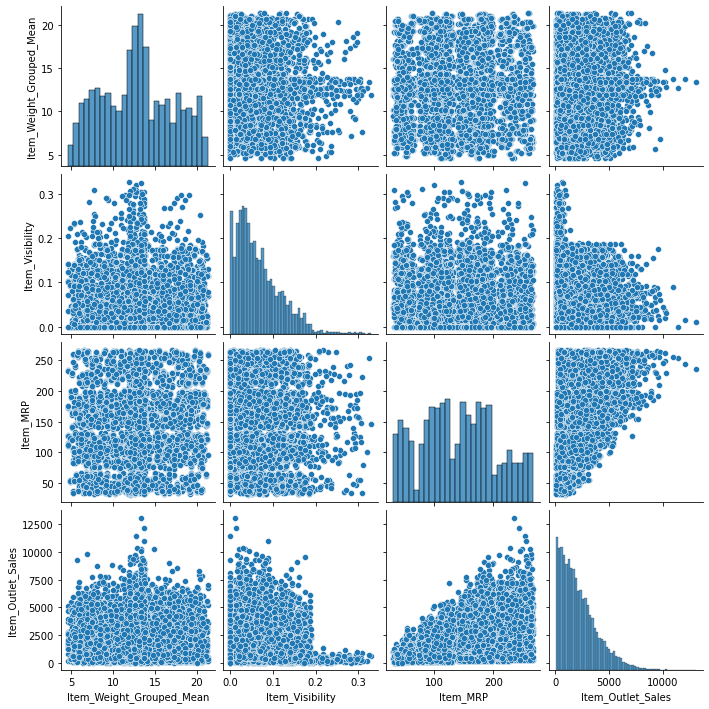

In [59]:
sns.pairplot(train[num_cols+[target]])

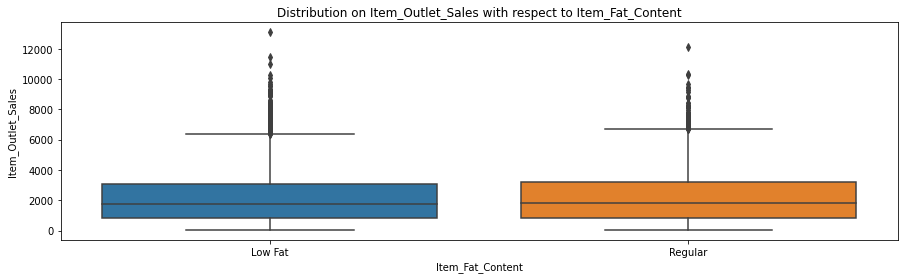

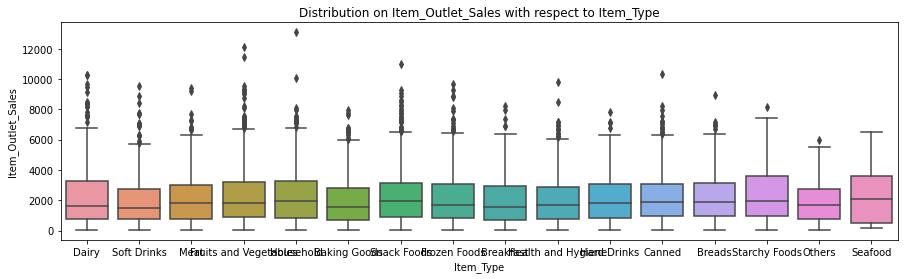

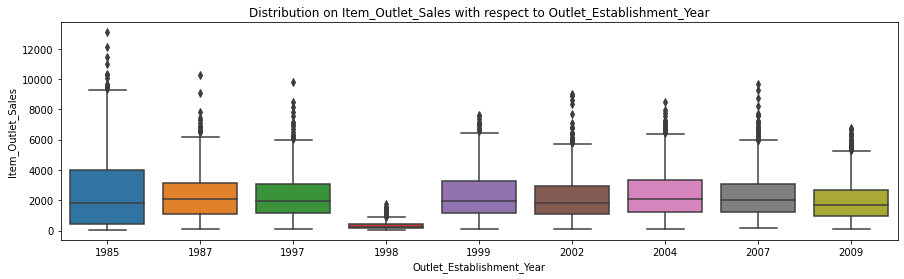

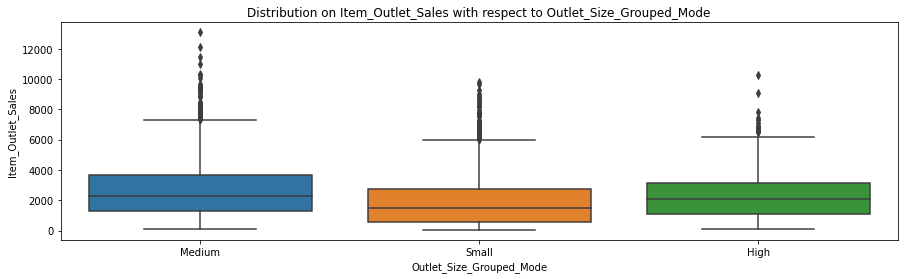

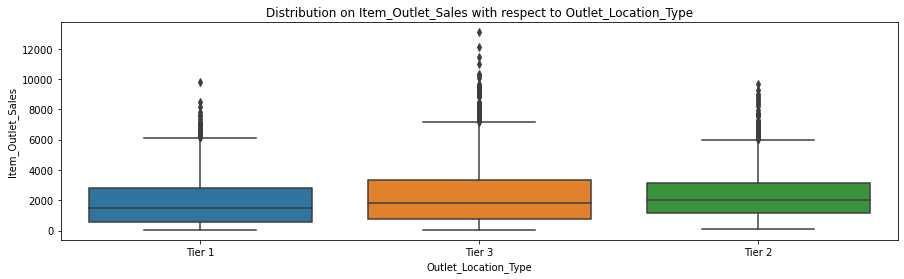

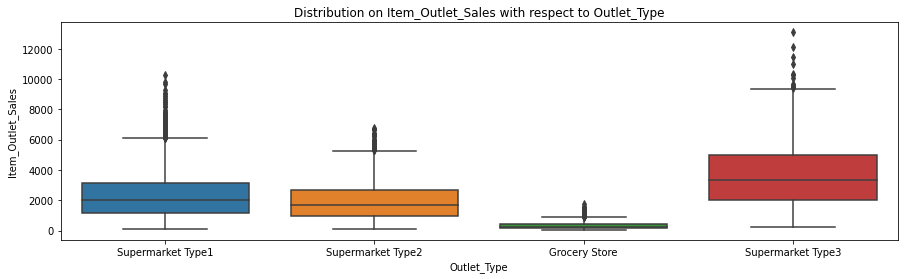

In [60]:
for cat_col in cat_cols:
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(111)
    sns.boxplot(x=cat_col, y = target, data = train, ax = ax)
    ax.set_xlabel(cat_col)
    ax.set_ylabel(target)
    ax.set_title(f'Distribution on {target} with respect to {cat_col}')

# Outlier Handling

In [61]:
# creating a function to handle outlier
def handle_outliers(df, var, mfa):
    var_data = df[var].values
    q25 = np.percentile(var_data, 25)
    q75 = np.percentile(var_data, 75)
    
    print(f'Outliers Handling for : {var}')
    print(f'Quartile 25 : {q25} , Quartile 75 : {q75}')
    
    iqr = q75-q25
    print(f'IQR : {iqr}')
    
    lower = q25-(mfa*iqr)
    upper = q75+(mfa*iqr)
    
    outliers = [x for x in var_data if x < lower or x > upper]
    
    print(f'Number of outliers in feature {var} is : {len(outliers)}')
    
    return list(df[(df[var] > upper) | (df[var] < lower)].index)

In [62]:
train_data = train.copy()

In [63]:
train.shape

(8523, 17)

In [64]:
train_data.shape

(8523, 17)

In [65]:
num_cols

['Item_Weight_Grouped_Mean', 'Item_Visibility', 'Item_MRP']

In [66]:
outliers = []

for num_col in num_cols:
    outliers.extend(handle_outliers(train_data,num_col,1.5))

outliers = list(set(outliers))
    
train_data = train_data.drop(outliers)

Outliers Handling for : Item_Weight_Grouped_Mean
Quartile 25 : 9.31 , Quartile 75 : 16.0
IQR : 6.6899999999999995
Number of outliers in feature Item_Weight_Grouped_Mean is : 0
Outliers Handling for : Item_Visibility
Quartile 25 : 0.0269894775 , Quartile 75 : 0.0945852925
IQR : 0.067595815
Number of outliers in feature Item_Visibility is : 144
Outliers Handling for : Item_MRP
Quartile 25 : 93.8265 , Quartile 75 : 185.6437
IQR : 91.8172
Number of outliers in feature Item_MRP is : 0


In [67]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Weight_Grouped_Mean,Outlet_Size_Mode,Outlet_Size_Grouped_Mode
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,9.300,9.300,Medium,Medium
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,5.920,5.920,Medium,Medium
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,17.500,17.500,Medium,Medium
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200,19.200,19.200,Medium,Small
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,8.930,8.930,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865,6.865,6.865,High,High
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380,8.380,8.380,Medium,Small
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600,10.600,10.600,Small,Small
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,7.210,7.210,Medium,Medium


In [68]:
8379 + 144

8523

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Visibility'>

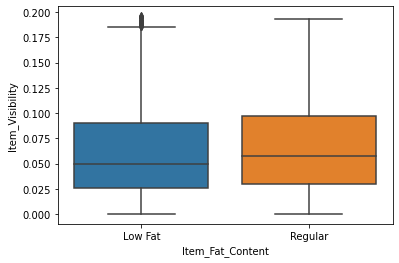

In [69]:
sns.boxplot(x='Item_Fat_Content', y='Item_Visibility', data=train_data)

# Categorical Encoding

In [70]:
train_data[num_cols + cat_cols].head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size_Grouped_Mode,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,Low Fat,Dairy,1999,Medium,Tier 1,Supermarket Type1
1,5.92,0.019278,48.2692,Regular,Soft Drinks,2009,Medium,Tier 3,Supermarket Type2
2,17.50,0.016760,141.6180,Low Fat,Meat,1999,Medium,Tier 1,Supermarket Type1
3,19.20,0.000000,182.0950,Regular,Fruits and Vegetables,1998,Small,Tier 3,Grocery Store
4,8.93,0.000000,53.8614,Low Fat,Household,1987,High,Tier 3,Supermarket Type1


In [71]:
# one hot encoding

In [72]:
pd.get_dummies(train_data[num_cols + cat_cols], columns=cat_cols, drop_first=True).shape

(8379, 34)

In [73]:
train_data_dum = pd.get_dummies(train_data[num_cols + cat_cols + [target]], columns=cat_cols, drop_first=True)

In [74]:
train_data_dum.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [75]:
train_data_dum.isnull().sum()

Item_Weight_Grouped_Mean           0
Item_Visibility                    0
Item_MRP                           0
Item_Outlet_Sales                  0
Item_Fat_Content_Regular           0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Establishment_Year_1987     0
Outlet_Establishment_Year_1997     0
Outlet_Establishment_Year_1998     0
Outlet_Establishment_Year_1999     0
Outlet_Establishment_Year_2002     0
Outlet_Establishment_Year_2004     0
Outlet_Establishment_Year_2007     0
O

In [76]:
train_data['Outlet_Establishment_Year'].value_counts()

1985    1386
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     488
Name: Outlet_Establishment_Year, dtype: int64

In [77]:
train_data_dum.columns

Index(['Item_Weight_Grouped_Mean', 'Item_Visibility', 'Item_MRP',
       'Item_Outlet_Sales', 'Item_Fat_Content_Regular', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009', 'Outlet_Size_Grouped_Mode_Medium',
       'Outlet_Size_Grouped_Mode_Small', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',

# Data Splits

In [78]:
from sklearn.model_selection import train_test_split

train_data_train, train_data_test = train_test_split(train_data_dum, test_size=0.2)

In [79]:
train_data_train.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3688,20.000000,0.000000,110.2544,1454.1072,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7321,19.350000,0.062626,165.3184,1651.1840,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6238,11.963444,0.168780,197.8768,197.0768,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8022,16.850000,0.159723,194.1478,5812.4340,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
5531,10.500000,0.019046,188.4240,2237.0880,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0


In [80]:
train_data_train.shape

(6703, 35)

In [81]:
train_data_test.shape

(1676, 35)

In [82]:
6703+1676

8379

In [83]:
x_train = train_data_train.drop(target, axis=1)
y_train = train_data_train[target]

In [84]:
x_test = train_data_test.drop(target, axis=1)
y_test = train_data_test[target]

#### For any class in sklearn

1. Create an object of the class
2. call 'fit' method of the object
3. call other methods like predict(), trasform()


# Feature Scaling


In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
sc = StandardScaler()

In [87]:
sc.fit(x_train[num_cols])

StandardScaler()

In [88]:
x_train[num_cols]

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP
3688,20.000000,0.000000,110.2544
7321,19.350000,0.062626,165.3184
6238,11.963444,0.168780,197.8768
8022,16.850000,0.159723,194.1478
5531,10.500000,0.019046,188.4240
...,...,...,...
435,15.350000,0.020310,218.0508
4669,14.850000,0.009954,158.2630
7265,12.150000,0.000000,39.1506
426,11.300000,0.007310,196.2426


In [89]:
x_train[num_cols] = sc.transform(x_train[num_cols])

In [90]:
x_train[num_cols]

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP
3688,1.677949,-1.376520,-0.494460
7321,1.525204,-0.014936,0.387512
6238,-0.210582,2.293037,0.909007
8022,0.937722,2.096116,0.849279
5531,-0.554481,-0.962427,0.757599
...,...,...,...
435,0.585233,-0.934946,1.232138
4669,0.467737,-1.160099,0.274504
7265,-0.166743,-1.376520,-1.633345
426,-0.366487,-1.217599,0.882832


In [91]:
sc.mean_

array([1.28595675e+01, 6.33126123e-02, 1.41124934e+02])

In [92]:
sc.mean_[0]

12.859567491258915

In [93]:
sc.var_ ** 0.5

array([4.25545186e+00, 4.59946846e-02, 6.24328264e+01])

In [94]:
sd = sc.var_ ** 0.5

In [95]:
sd[0]

4.255451855381868

In [96]:
(11.0 - sc.mean_[0]) / sd[0]

-0.43698473263353227

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler

In [97]:
x_test[num_cols] = sc.transform(x_test[num_cols])

In [98]:
x_test[num_cols]

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP
7711,-1.527351,-1.246536,0.360830
6515,1.525204,-0.971295,-0.494460
6296,1.842444,2.268951,-0.270469
4929,-0.072042,-1.075146,-0.747663
3009,0.125000,-0.590556,1.256122
...,...,...,...
1462,0.066443,2.318324,-0.398440
5792,0.585233,-1.076208,-1.223846
8013,-1.157237,-1.002935,-1.439786
3278,-0.530982,-0.141917,1.454992


In [99]:
x_train.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3688,1.677949,-1.376520,-0.494460,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7321,1.525204,-0.014936,0.387512,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6238,-0.210582,2.293037,0.909007,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8022,0.937722,2.096116,0.849279,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
5531,-0.554481,-0.962427,0.757599,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0


In [100]:
y_train.head()

3688    1454.1072
7321    1651.1840
6238     197.0768
8022    5812.4340
5531    2237.0880
Name: Item_Outlet_Sales, dtype: float64

In [101]:
x_test.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7711,-1.527351,-1.246536,0.360830,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6515,1.525204,-0.971295,-0.494460,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
6296,1.842444,2.268951,-0.270469,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4929,-0.072042,-1.075146,-0.747663,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3009,0.125000,-0.590556,1.256122,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [102]:
y_test.head()

7711    1151.1682
6515    1677.8160
6296     247.6776
4929    2036.0164
3009    5695.2532
Name: Item_Outlet_Sales, dtype: float64

In [103]:
# x_train, y_train, x_test, y_test

# End of Data Preprocessing

# Modelling

#### Simple Linear Regression -> Benchmark

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
lin_reg_slr = LinearRegression()


#### sklearn expectation:
* x --> 2D array(matrix)
* y --> 1D array(vector)

In [106]:
x_train['Item_MRP'].values.reshape(-1,1).shape

(6703, 1)

In [107]:
x_train.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3688,1.677949,-1.376520,-0.494460,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7321,1.525204,-0.014936,0.387512,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6238,-0.210582,2.293037,0.909007,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8022,0.937722,2.096116,0.849279,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
5531,-0.554481,-0.962427,0.757599,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0


In [108]:
y_train.head()

3688    1454.1072
7321    1651.1840
6238     197.0768
8022    5812.4340
5531    2237.0880
Name: Item_Outlet_Sales, dtype: float64

In [109]:
lin_reg_slr.fit(x_train['Item_MRP'].values.reshape(-1,1), y_train.values)

LinearRegression()

In [110]:
# y_pred_slr = lin_reg_slr.predict()

##### Simple Linear Regression:
* y_train(Item_Outlet_Sale) = b0 + b1*x_train(Item_MRP)

In [111]:
b0 = lin_reg_slr.intercept_

In [112]:
b1 = lin_reg_slr.coef_

In [113]:
y_train_slr = lin_reg_slr.predict(x_train['Item_MRP'].values.reshape(-1,1))

Text(0.5, 1.0, 'Benchmark')

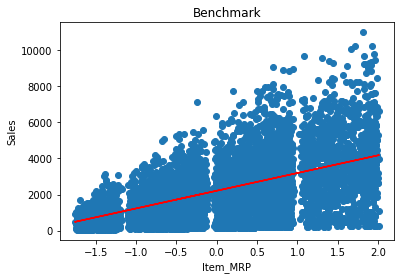

In [114]:
plt.scatter(x_train['Item_MRP'], y_train)
plt.plot(x_train['Item_MRP'], y_train_slr, 'r')
plt.xlabel('Item_MRP')
plt.ylabel('Sales')
plt.title('Benchmark')

In [115]:
#y_test_slr
y_pred_slr = lin_reg_slr.predict(x_test['Item_MRP'].values.reshape(-1,1))

In [116]:
# actual -> y_test
# predicted -> y_pred_slr

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [118]:
mse = mean_squared_error(y_test, y_pred_slr)
mse

2010187.1998506298

In [119]:
mae = mean_absolute_error(y_test, y_pred_slr)
mae

1020.5419124164249

In [120]:
rmse = mse**0.5
rmse

1417.810706635632

#### Multiple Linear Regression  -> Machine Learning

In [121]:
lin_reg_mlr = LinearRegression()

In [122]:
lin_reg_mlr.fit(x_train, y_train)

LinearRegression()

In [123]:
y_pred_mlr = lin_reg_mlr.predict(x_test)

In [124]:
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
mse_mlr

1320516.128707055

In [125]:
rmse = mse**0.5
rmse

1417.810706635632

In [126]:
mae = mean_absolute_error(y_test, y_pred_mlr)
mae

841.2788810859189

#### Modelling at scale -> Linear, Ridge, Lasso

In [127]:
from sklearn.linear_model import Ridge, Lasso

In [128]:
ridge = Ridge()
lasso = Lasso()

In [129]:
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)

Lasso()

In [130]:
y_pred_ridge = ridge.predict(x_test)
y_pred_lasso = lasso.predict(x_test)

In [131]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

In [132]:
rmse_ridge = mse_ridge**0.5
rmse_lasso = mse_lasso**0.5

In [133]:
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

#### Modelling at scale -> Multiple (OOP)

In [134]:
regressors = ['LinearRegression', 'Ridge', 'Lasso', 'BayesianRidge', 'HuberRegressor']

In [135]:
from sklearn.linear_model import BayesianRidge, HuberRegressor
from sklearn.metrics import median_absolute_error, r2_score

models = []
mae = []
mse = []
mdae = []
rs = []
rmse = []

In [136]:
for regressor in regressors:
    model = eval(regressor)()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    models.append(type(model).__name__)
    
    mae.append(mean_absolute_error(y_test,y_pred))
    mse.append(mean_squared_error(y_test, y_pred))
    mdae.append(median_absolute_error(y_test, y_pred))
    rs.append(r2_score(y_test, y_pred))
    rmse.append(mean_squared_error(y_test, y_pred)**0.5)

In [137]:
models

['LinearRegression', 'Ridge', 'Lasso', 'BayesianRidge', 'HuberRegressor']

In [138]:
mae

[841.2788810859189,
 840.6104067838598,
 839.6695600233263,
 840.4648438409296,
 835.681051442326]

In [139]:
mse

[1320516.128707055,
 1318592.6622237759,
 1316250.0135666197,
 1318888.0762673912,
 1348802.9872357014]

In [140]:
model_dict = {'Models':models,
             'Mean_Squared_Error':mse,
             'Mean_Absolute_Error':mae,
             'Median_Absolute_Error':mdae,
             'R2_Score':rs,
             'RMSE':rmse}

In [141]:
model_dict

{'Models': ['LinearRegression',
  'Ridge',
  'Lasso',
  'BayesianRidge',
  'HuberRegressor'],
 'Mean_Squared_Error': [1320516.128707055,
  1318592.6622237759,
  1316250.0135666197,
  1318888.0762673912,
  1348802.9872357014],
 'Mean_Absolute_Error': [841.2788810859189,
  840.6104067838598,
  839.6695600233263,
  840.4648438409296,
  835.681051442326],
 'Median_Absolute_Error': [645.46755,
  652.2095918921672,
  644.9366472911764,
  650.7657013757297,
  626.6573210154731],
 'R2_Score': [0.5587654789199592,
  0.5594081820222637,
  0.5601909497869492,
  0.5593094729862881,
  0.5493137666656251],
 'RMSE': [1149.1371235440333,
  1148.2999008202412,
  1147.2793964708944,
  1148.428524666377,
  1161.3797773492104]}

In [142]:
model_df = pd.DataFrame(model_dict)

model_df

,Models,Mean_Squared_Error,Mean_Absolute_Error,Median_Absolute_Error,R2_Score,RMSE
0,LinearRegression,1.320516e+06,841.278881,645.467550,0.558765,1149.137124
1,Ridge,1.318593e+06,840.610407,652.209592,0.559408,1148.299901
2,Lasso,1.316250e+06,839.669560,644.936647,0.560191,1147.279396
3,BayesianRidge,1.318888e+06,840.464844,650.765701,0.559309,1148.428525
4,HuberRegressor,1.348803e+06,835.681051,626.657321,0.549314,1161.379777


In [143]:
model_df.sort_values(by=['R2_Score', 'Mean_Absolute_Error'], ascending=[False, True], inplace=True)

model_df

,Models,Mean_Squared_Error,Mean_Absolute_Error,Median_Absolute_Error,R2_Score,RMSE
2,Lasso,1.316250e+06,839.669560,644.936647,0.560191,1147.279396
1,Ridge,1.318593e+06,840.610407,652.209592,0.559408,1148.299901
3,BayesianRidge,1.318888e+06,840.464844,650.765701,0.559309,1148.428525
0,LinearRegression,1.320516e+06,841.278881,645.467550,0.558765,1149.137124
4,HuberRegressor,1.348803e+06,835.681051,626.657321,0.549314,1161.379777


#### Cross Validation

In [144]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score

In [145]:
kf = KFold(n_splits=50)

In [146]:
cv_scores = cross_val_score(estimator=lasso, X=x_train, y=y_train, cv=kf, n_jobs=12)

In [147]:
cv_scores

array([0.5385374 , 0.54645846, 0.62596093, 0.5286181 , 0.57117813,
       0.63534673, 0.51093075, 0.53641901, 0.52517089, 0.54599101,
       0.52686682, 0.53673753, 0.56909102, 0.49079621, 0.62657059,
       0.52214103, 0.44920628, 0.57347553, 0.48782662, 0.58196783,
       0.4997423 , 0.62295702, 0.47842737, 0.50455343, 0.62181552,
       0.57783726, 0.56688106, 0.52167505, 0.54488288, 0.5907934 ,
       0.57008009, 0.53442412, 0.52643727, 0.52026902, 0.62733502,
       0.61670143, 0.42572503, 0.38715437, 0.59610515, 0.61913795,
       0.57481356, 0.52979284, 0.62477525, 0.6280848 , 0.53449676,
       0.61086824, 0.57967299, 0.51013533, 0.53873976, 0.58586115])

C:\Users\shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

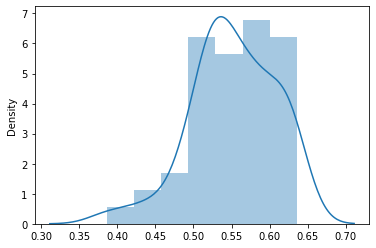

In [148]:
sns.distplot(cv_scores)

C:\Users\shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


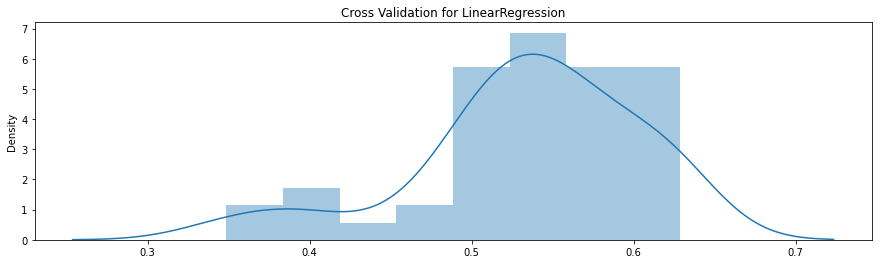

C:\Users\shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


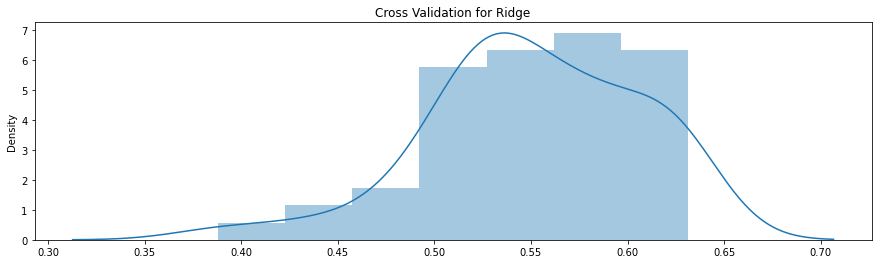

C:\Users\shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


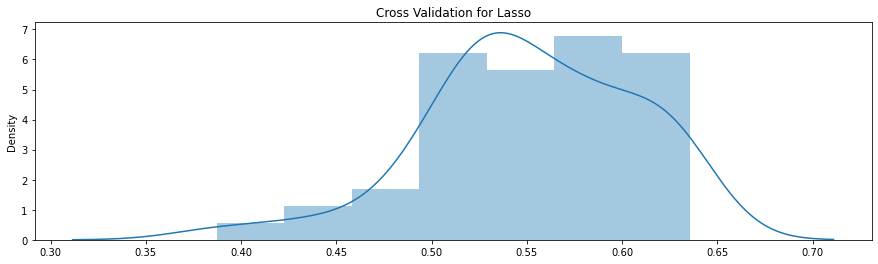

C:\Users\shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


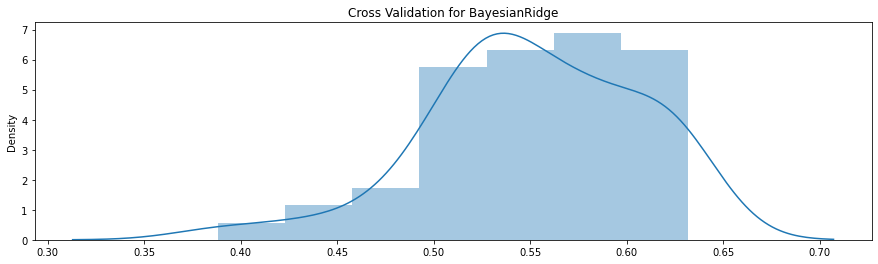

C:\Users\shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


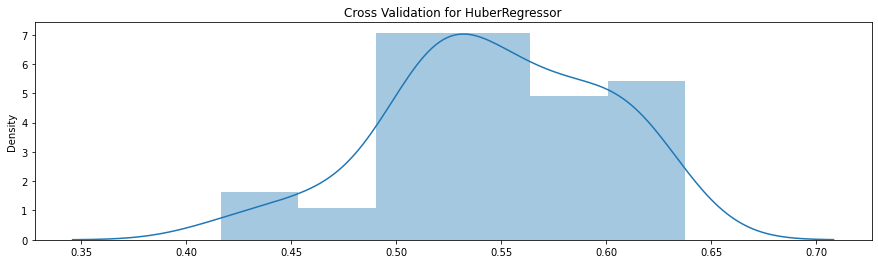

In [149]:
for regressor in regressors:
    model = eval(regressor)()
    model.fit(x_train, y_train)
    cv_scores = cross_val_score(estimator=model,
                               X=x_train,
                               y=y_train,
                               cv=kf,
                               n_jobs=12)
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(111)
    ax = sns.distplot(cv_scores)
    ax.set_title(f'Cross Validation for {regressor}')
    plt.show()
    print('\n')

In [150]:
# END of Regression

# For submission in analytics Vidhya

In [151]:
df1 = pd.read_csv('test_AbJTz2l.csv')

In [152]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [153]:
#y_pred_lasso = lasso.predict(df1)

In [154]:
x_train.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3688,1.677949,-1.376520,-0.494460,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7321,1.525204,-0.014936,0.387512,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6238,-0.210582,2.293037,0.909007,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8022,0.937722,2.096116,0.849279,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
5531,-0.554481,-0.962427,0.757599,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
